Davies-Bouldin Index (DBI): 1.3253565994399066
Silhouette Score: 0.24055228830667674


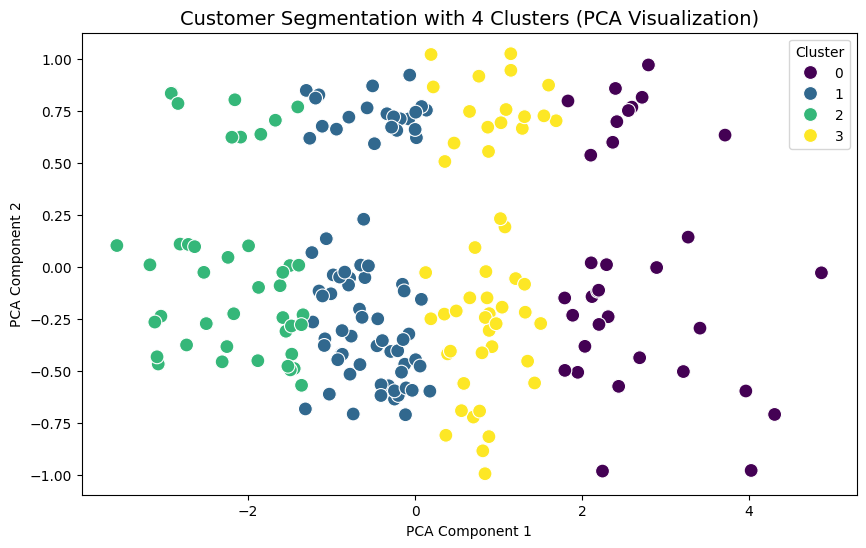

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv(r"C:\Users\janac\Downloads\Customers.csv" )
transactions = pd.read_csv(r"C:\Users\janac\Downloads\Transactions.csv")

# Aggregate transaction data at the customer level
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',   # Total spending
    'Quantity': 'sum',     # Total items purchased
    'TransactionID': 'count'  # Number of transactions
}).reset_index()
customer_transactions.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)

# Merge customer profile data with aggregated transaction data
customer_data = customers.merge(customer_transactions, on='CustomerID', how='left').fillna(0)

# One-hot encode categorical features (e.g., Region)
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Normalize numerical features
numerical_features = ['TotalValue', 'Quantity', 'TransactionCount']
scaler = StandardScaler()
customer_data[numerical_features] = scaler.fit_transform(customer_data[numerical_features])

# Feature set for clustering
X = customer_data.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'])

# Clustering (choose number of clusters between 2 and 10)
n_clusters = 4  # You can adjust this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X)

# Calculate Davies-Bouldin Index (DBI)
db_index = davies_bouldin_score(X, customer_data['Cluster'])
print(f"Davies-Bouldin Index (DBI): {db_index}")

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, customer_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Dimensionality reduction for visualization (using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA components and cluster labels for visualization
customer_data['PCA1'] = X_pca[:, 0]
customer_data['PCA2'] = X_pca[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title(f'Customer Segmentation with {n_clusters} Clusters (PCA Visualization)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Save results to CSV
customer_data.to_csv(r"C:\Users\janac\OneDrive\Desktop\kushala_Asanapuram_Clustering.csv", index=False)
